<a href="https://colab.research.google.com/github/ZHUTING0522/line_broadcast_msg/blob/main/B2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=4e772d1e72705379db7ea3c303b12d179cadbbbef048929b595ebf9adb671ff3
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.decomposition import PCA

japanize_matplotlib.japanize()

In [13]:
from google.colab import files
uploaded = files.upload()

Saving 2023_japan_pref_stat.csv to 2023_japan_pref_stat.csv


In [14]:
scores = pd.read_csv("2023_japan_pref_stat.csv", index_col = 0, header = 0)

In [15]:
scores.shape

(47, 176)

In [16]:
scores

,総人口,総人口（男）,総人口（女）,外国人人口,人口密度（総面積）,人口密度（可住地面積）,昼夜間人口比率,15歳未満人口率,65歳以上人口率,15-64歳人口率,...,月当たり支出,食料費比率,住居費比率,光熱費比率,保険医療費比率,服飾費比率,交通費比率,教育費比率,金融資産残高,金融負債残高
北海道,518,245,274,656.9,66.1,228.3,100.0,10.5,32.5,57.0,...,268.4,26.6,8.2,9.9,5.1,3.3,11.4,3.7,9994,4025
青森県,122,58,65,436.9,126.6,375.3,99.9,10.4,34.3,55.3,...,245.1,28.4,5.4,11.4,4.4,2.7,13.2,2.2,8413,4400
岩手県,120,58,62,573.1,78.3,318.8,99.8,10.8,34.2,55.1,...,272.9,27.0,6.3,9.9,4.4,3.3,13.7,3.5,11657,4197
宮城県,229,112,117,845.0,314.5,718.8,100.1,11.5,28.6,59.9,...,284.2,26.6,7.0,8.1,5.1,3.3,14.4,3.6,13691,5501
秋田県,95,45,50,380.5,81.2,292.3,99.8,9.5,38.1,52.4,...,247.8,29.2,4.2,10.7,4.6,2.9,14.5,2.1,10205,3664
山形県,106,51,54,669.4,113.2,367.2,99.7,11.1,34.3,54.6,...,321.4,24.7,6.4,9.2,4.0,2.7,20.9,3.1,11631,4300
福島県,181,89,92,702.0,131.5,428.3,100.1,11.2,32.3,56.6,...,292.7,26.1,6.8,8.9,3.8,2.5,18.8,3.3,11895,4693
茨城県,285,142,143,2016.7,467.8,733.4,97.8,11.5,30.1,58.4,...,275.8,24.7,7.9,7.6,4.6,2.9,17.5,2.6,14493,5809
栃木県,192,96,96,1935.1,299.8,639.3,99.1,11.6,29.6,58.8,...,281.1,26.5,6.3,7.4,4.5,3.1,15.6,3.3,13619,5028
群馬県,193,95,97,2755.5,302.9,849.3,100.0,11.5,30.5,58.0,...,286.6,26.3,6.9,6.5,5.3,3.4,15.8,3.3,13326,5955


In [17]:
pca = PCA(n_components = 5, whiten = False)

In [18]:
pca.fit(scores)

PCA(n_components=5)

In [19]:
pca.n_components_

5

In [20]:
pca.explained_variance_ratio_

array([7.58533738e-01, 2.41153188e-01, 1.81191881e-04, 6.01287961e-05,
       4.65078457e-05])

In [21]:
pca.components_

array([[ 8.81981742e-06,  4.35286486e-06,  4.46348598e-06,
         1.54484317e-05,  2.81954516e-05,  4.00739668e-05,
        -2.26938439e-08, -3.58268335e-09, -6.60543040e-08,
         7.00216108e-08,  1.22434031e-09, -3.43821500e-08,
         5.70894864e-09,  2.56978475e-09,  4.06555912e-06,
        -6.30005579e-08,  7.44147300e-09, -2.03337482e-10,
         4.46065690e-07, -3.76116515e-07,  3.89143082e-07,
         2.30163372e-09, -3.18341691e-09,  5.57626786e-09,
         1.97429426e-06, -3.42012947e-07, -1.55762966e-07,
         8.19212173e-06,  4.85976347e-08,  1.47949505e-04,
         2.79481932e-08,  3.35235964e-08,  2.00803955e-05,
         2.83105242e-06,  7.98150138e-08,  2.85464530e-08,
         6.48989615e-09,  2.24726861e-07, -7.80007469e-08,
         1.34795024e-08,  7.27502718e-09, -2.00865750e-11,
         1.04462984e-07,  5.72484221e-09,  3.68753293e-07,
         5.99808502e-07,  2.02912626e-07,  9.10798811e-06,
         1.74694698e-08,  2.11357326e-08,  7.45052519e-0

In [22]:
x = pca.transform(scores)
x

array([[ 1.64434921e+07,  2.84265678e+06,  9.55783599e+05,
         1.80787332e+05,  5.00065592e+05],
       [-1.54700762e+07, -1.16721522e+06,  1.11699752e+06,
         4.27325152e+05, -5.02168663e+04],
       [-1.68860879e+07, -7.12538819e+04,  7.22745470e+05,
        -1.64432144e+04, -1.18060169e+05],
       [-5.40943484e+06, -4.65191732e+05, -1.16831106e+05,
        -2.02612931e+05,  2.86687903e+05],
       [-7.49271642e+06, -7.52773350e+06,  4.88375286e+05,
        -4.78480357e+04, -8.82899541e+04],
       [-1.51790941e+07, -1.83521032e+06,  6.74424246e+04,
        -3.08797029e+04, -1.18294733e+05],
       [ 3.00398219e+07, -2.11831243e+07, -2.44252216e+04,
        -3.38158708e+05,  9.80715123e+03],
       [ 1.72001814e+07, -3.01531921e+06, -1.73421419e+04,
         1.03785131e+04,  1.10783726e+05],
       [-6.76026641e+06,  2.22991962e+06, -4.34238094e+05,
        -4.74357755e+03,  6.97954961e+04],
       [-1.24134243e+07,  5.28200252e+06, -2.67033408e+05,
         1.68521912e+05

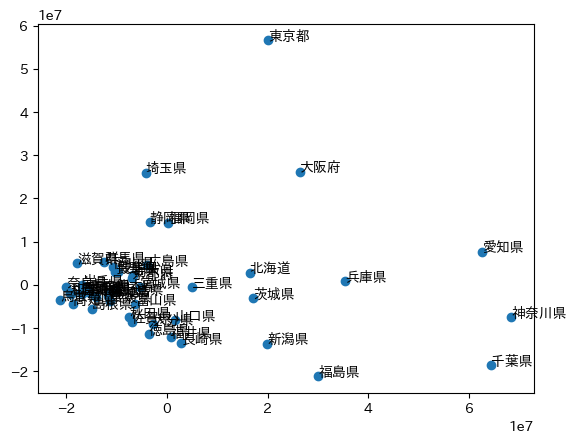

In [23]:
plt.scatter(x[:,0], x[:,1])
for d, l in zip(x, scores.index.values):
  plt.text(d[0], d[1], l)